<a href="https://colab.research.google.com/github/Dimisz/tensorflow_lectures/blob/main/RNN_Exercise_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

___

<a href='http://www.pieriandata.com'><img src='../Pierian_Data_Logo.png'/></a>
___
<center><em>Copyright Pierian Data</em></center>
<center><em>For more information, visit us at <a href='http://www.pieriandata.com'>www.pieriandata.com</a></em></center>

# RNN Exercise

**TASK: IMPORT THE BASIC LIBRARIES YOU THINK YOU WILL USE**

In [40]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Data

Info about this data set: https://fred.stlouisfed.org/series/IPN31152N


Units:  Index 2012=100, Not Seasonally Adjusted

Frequency:  Monthly

The industrial production (IP) index measures the real output of all relevant establishments located in the United States, regardless of their ownership, but not those located in U.S. territories.

NAICS = 31152

Source Code: IP.N31152.N

Suggested Citation:
Board of Governors of the Federal Reserve System (US), Industrial Production: Nondurable Goods: Ice cream and frozen dessert [IPN31152N], retrieved from FRED, Federal Reserve Bank of St. Louis; https://fred.stlouisfed.org/series/IPN31152N, November 16, 2019.

# Project Tasks

**TASK: Read in the data set "Frozen_Dessert_Production.csv" from the Data folder. Figure out how to set the date to a datetime index columns**

In [1]:
!wget "https://raw.githubusercontent.com/Dimisz/tensorflow_lectures/main/Frozen_Dessert_Production.csv"

--2021-10-06 08:52:51--  https://raw.githubusercontent.com/Dimisz/tensorflow_lectures/main/Frozen_Dessert_Production.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 11828 (12K) [text/plain]
Saving to: ‘Frozen_Dessert_Production.csv’

Frozen_Dessert_Prod 100%[===================>]  11.55K  --.-KB/s    in 0s      

2021-10-06 08:52:51 (48.4 MB/s) - ‘Frozen_Dessert_Production.csv’ saved [11828/11828]



In [46]:
df = pd.read_csv("/content/Frozen_Dessert_Production.csv", parse_dates=True, index_col='DATE')
df.head()

,IPN31152N
DATE,
1972-01-01,59.9622
1972-02-01,67.0605
1972-03-01,74.2350
1972-04-01,78.1120
1972-05-01,84.7636


,IPN31152N
DATE,
1972-01-01,59.9622
1972-02-01,67.0605
1972-03-01,74.2350
1972-04-01,78.1120
1972-05-01,84.7636


**Task: Change the column name to Production**

In [47]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 573 entries, 1972-01-01 to 2019-09-01
Data columns (total 1 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   IPN31152N  573 non-null    float64
dtypes: float64(1)
memory usage: 9.0 KB


In [48]:
df.columns = ['Production']
df.head()

,Production
DATE,
1972-01-01,59.9622
1972-02-01,67.0605
1972-03-01,74.2350
1972-04-01,78.1120
1972-05-01,84.7636


,Production
DATE,
1972-01-01,59.9622
1972-02-01,67.0605
1972-03-01,74.2350
1972-04-01,78.1120
1972-05-01,84.7636


**TASK: Plot out the time series**

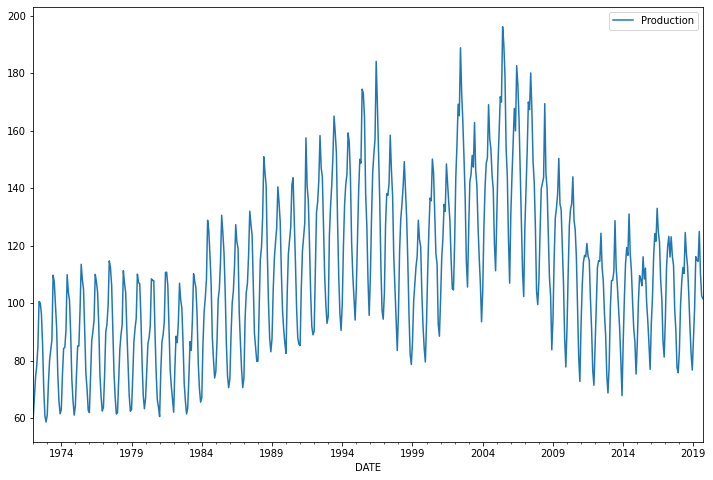

In [49]:
#CODE HERE
df.plot(figsize=(12,8))

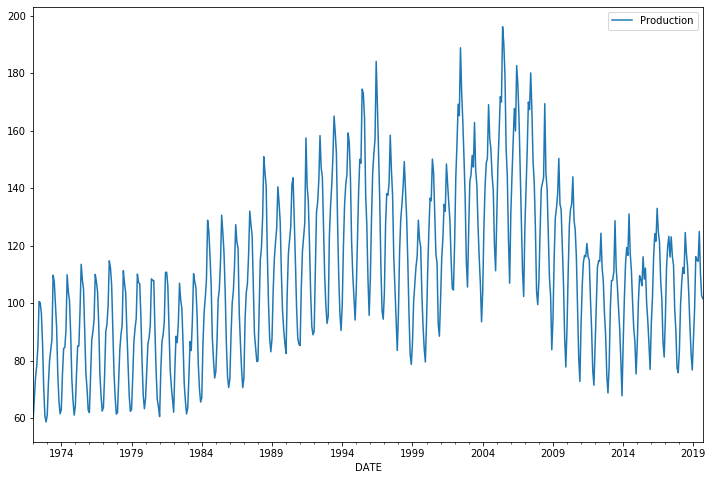

## Train Test Split

**TASK: Figure out the length of the data set**

In [50]:
#CODE HERE
len(df)

573

573

**TASK: Split the data into a train/test split where the test set is the last 24 months of data.**

In [52]:
#CODE HERE
split_index = len(df) - 18

In [53]:
train_set = df.iloc[:split_index]
test_set = df.iloc[split_index:]

In [54]:
len(df), len(train_set), len(test_set)

(573, 555, 18)

## Scale Data

**TASK: Use a MinMaxScaler to scale the train and test sets into scaled versions.**

In [55]:
# CODE HERE
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [56]:
scaler.fit(train_set)

MinMaxScaler(copy=True, feature_range=(0, 1))

In [57]:
scaled_train_set = scaler.transform(train_set)
scaled_test_set = scaler.transform(test_set)

# Time Series Generator

**TASK: Create a TimeSeriesGenerator object based off the scaled_train data. The batch length is up to you, but at a minimum it should be at least 18 to capture a full year seasonality.**

In [58]:
#CODE HERE
from tensorflow.keras.preprocessing.sequence import TimeseriesGenerator

In [59]:
length = 12
generator = TimeseriesGenerator(scaled_train_set, scaled_train_set,
                                length=length, batch_size=1)

In [60]:
X,y = generator[0]

In [61]:
X, y

(array([[[0.00947104],
         [0.06108982],
         [0.11326273],
         [0.14145625],
         [0.18982663],
         [0.30495972],
         [0.30154406],
         [0.27416065],
         [0.19736841],
         [0.08532665],
         [0.01561588],
         [0.        ]]]), array([[0.01774221]]))

In [62]:
n_features = 1

### Create the Model

**TASK: Create a Keras Sequential Model with as many LSTM units you want and a final Dense Layer.**

In [63]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM

In [64]:
model = Sequential()
model.add(LSTM(150, input_shape=(length, n_features)))
model.add(Dense(1))

model.compile(optimizer="adam",
              loss="mse")

In [65]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_1 (LSTM)                (None, 150)               91200     
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 151       
Total params: 91,351
Trainable params: 91,351
Non-trainable params: 0
_________________________________________________________________


**TASK: Create a generator for the scaled test/validation set. NOTE: Double check that your batch length makes sense for the size of the test set as mentioned in the RNN Time Series video.**

In [66]:
# CODE HERE
validation_generator = TimeseriesGenerator(scaled_test_set, scaled_test_set,
                                           length=length, batch_size=1)

**TASK: Create an EarlyStopping callback based on val_loss.**

In [67]:
#CODE HERE
from tensorflow.keras.callbacks import EarlyStopping

In [68]:
early_stop = EarlyStopping(monitor="val_loss", patience=2)

**TASK: Fit the model to the generator, let the EarlyStopping dictate the amount of epochs, so feel free to set the parameter high.**

In [69]:
# CODE HERE
model.fit_generator(generator, epochs=20,
                    validation_data=validation_generator,
                    callbacks=[early_stop])

/usr/local/lib/python3.7/dist-packages/keras/engine/training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/20
543/543 [==============================] - 7s 10ms/step - loss: 0.0139 - val_loss: 0.0015
Epoch 2/20
543/543 [==============================] - 5s 9ms/step - loss: 0.0042 - val_loss: 0.0045
Epoch 3/20
543/543 [==============================] - 5s 10ms/step - loss: 0.0036 - val_loss: 0.0018


**TASK: Plot the history of the loss that occured during training.**

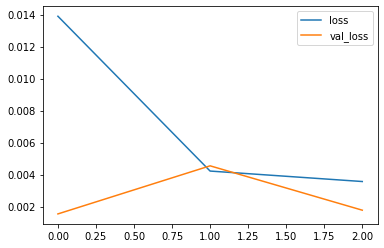

In [70]:
# CODE HERE
losses = pd.DataFrame(model.history.history)
losses.plot()

## Evaluate on Test Data

**TASK: Forecast predictions for your test data range (the last 12 months of the entire dataset). Remember to inverse your scaling transformations. Your final result should be a DataFrame with two columns, the true test values and the predictions.**

In [71]:
# CODE HERE
test_predictions = []

first_eval_batch = scaled_train_set[-length:]
current_batch = first_eval_batch.reshape((1, length, n_features))

for i in range(len(test_set)):
  #get prediction 1 time stamp ahead
  current_pred = model.predict(current_batch)[0]

  # store predictions
  test_predictions.append(current_pred)

  #update batch to now include predictions and drop first value
  current_batch = np.append(current_batch[:,1:,:],[[current_pred]], axis=1)

In [72]:
true_predictions = scaler.inverse_transform(test_predictions)

In [73]:
test_set['Predictions'] = true_predictions

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [74]:
test_set

,Production,Predictions
DATE,,
2018-04-01,112.4309,116.867643
2018-05-01,110.3544,120.969274
2018-06-01,124.5841,121.282883
2018-07-01,117.2215,116.823275
2018-08-01,112.6779,108.880136
2018-09-01,103.3118,99.337473
2018-10-01,92.1321,92.258748
2018-11-01,82.4347,90.082717
2018-12-01,76.7608,93.918174


**TASK: Plot your predictions versus the True test values. (Your plot may look different than ours).**

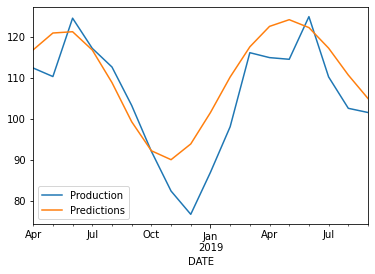

In [75]:
# CODE HERE
test_set.plot()

**TASK: Calculate your RMSE.**

In [76]:
from sklearn.metrics import mean_squared_error

In [77]:
test_set.head()

,Production,Predictions
DATE,,
2018-04-01,112.4309,116.867643
2018-05-01,110.3544,120.969274
2018-06-01,124.5841,121.282883
2018-07-01,117.2215,116.823275
2018-08-01,112.6779,108.880136


In [78]:
rmse = np.sqrt(mean_squared_error(test_set['Production'], test_set['Predictions']))
rmse

8.07309166418266

In [80]:
mean_price = np.mean(df['Production'])

In [82]:
error_percent = rmse/mean_price
error_percent

0.07346150052414384